## Credit Card Fraud Detection

In this notebook we are trying to predict credit card fraud. The data set is highly unbalanced and has a binary classification. The focus will be on logistic regression, decision trees and random forest. 

The procedure will be: 
* Preprocessing 
* Feature selection 
* Training and testing 
* Evaluation 

In upcoming notebooks I will treat pipelines and cross validation aswell. 

In [11]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn import tree
import matplotlib.pyplot as plt 
#from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#### 1. Load and prepare data

In [3]:
# Standardize for upcoming PCA 
scale = StandardScaler()
data = pd.DataFrame(pd.read_csv("creditcard.csv"))
# Drop irrelevant columns
scale.fit(data.drop("Amount", axis=1).drop("Class", axis=1).drop("Time", axis=1))
# Split into X and y 
X = pd.DataFrame(scale.transform(data.drop("Amount", axis=1).drop("Class", axis=1).drop("Time", axis=1)))
y = data["Class"]
# The dataset is partly preprocessed and has no missing values, therefor we don't have to fill or drop NA's

#### 2. Feature selection with PCA 

PCA tries to reduce the number of features while retain most of the explained variance. 

In [4]:
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state=0)
pca.fit(X)
data_red = pd.DataFrame(pca.transform(X))
total_var = sum(pca.explained_variance_)
var_95 = total_var*.95

print("Our total explained variance: ", total_var)
print("95% of our explained variance: ", var_95)

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["Principal components", "Explained variance"])

# Look for the number of components which explain 95% of our variance
print("Explained variance of 10 components: ", sum(a["Explained variance"][0:9]))
print("Explained variance of 15 components: ", sum(a["Explained variance"][0:14]))
print("Explained variance of 20 components: ", sum(a["Explained variance"][0:19]))
print("Explained variance of 25 components: ", sum(a["Explained variance"][0:24]))
print("Explained variance of 27 components: ", sum(a["Explained variance"][0:26]))
print("Explained variance of 28 components: ", sum(a["Explained variance"][0:27]))

Our total explained variance:  28.000098312535552
95% of our explained variance:  26.600093396908772
Explained variance of 10 components:  9.000031600457891
Explained variance of 15 components:  14.000049156267808
Explained variance of 20 components:  19.000066712077732
Explained variance of 25 components:  24.000084267887647
Explained variance of 27 components:  26.00009129021161
Explained variance of 28 components:  27.00009480137359


The dimensions seem to be reduced allready. 95% of the variance is only explained by 27 components. We continue with the original data set. 

####  3. Split the data in train and test data 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### 4. Logistic regression classification

logistic regression is easy to implement and interpret and very efficient to train. We will start with the basic settings and add class weights afterwards. 

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93865
1      122
dtype: int64
f1 score:  0.7474048442906575
blanaced acc:  0.8232786824560216
precision:  0.8852459016393442


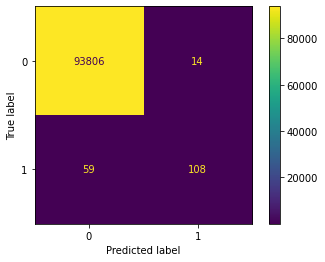

In [12]:
# Train and fit the model 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = pd.DataFrame(lr.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred))

plot_confusion_matrix(lr, X_test, y_test)
plt.show()

#### 4.1 adding classweight to improve the result 

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93813
1      174
dtype: int64
f1 score:  0.7800586510263929
balanced acc:  0.8979850892969976
precision:  0.764367816091954
recall:  0.7964071856287425


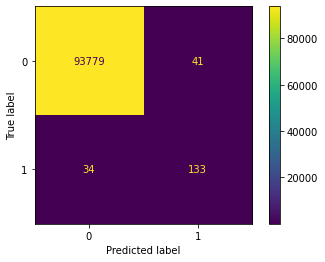

In [20]:
class_weight = {
    0: .1,
    1: .9
} 

# Train and fit the model 
lr_weighted = LogisticRegression(class_weight=class_weight)
lr_weighted.fit(X_train, y_train)
y_pred_weighted = pd.DataFrame(lr_weighted.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_weighted.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred_weighted))
print("balanced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_weighted))
print("precision: ", metrics.precision_score(y_test, y_pred_weighted))
print("recall: ", metrics.recall_score(y_test, y_pred_weighted))

plot_confusion_matrix(lr_weighted, X_test, y_test)
plt.show()

With class weighting, we were able to improve the fscore by 11% and the number of correct predicted objects by over 30% and reduce the incorrect predicted by half. 
The weighted logistic regression thus represents a good model. Nevertheless, we will test and evaluate further classification algorithms. Furthermore, there is of course the risk of overfitting, which still needs to be tested. 

#### 5. Decision tree classification 

With decision trees we are able to easily visualize our results. This can be very usefull in some usecases. However a decision tree tend to overfit. To avoid this we are going to prune the tree and add a class weight aswell. Another way to prevent overfitting is to have decision trees in a ensemble, for example random forests which we use at last. The criterion will be for both "entropy".  

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93811
1      176
dtype: int64
f1 score:  0.7638483965014576
blanaced acc:  0.8919757479285726
precision:  0.7443181818181818
recall:  0.7844311377245509
depth of the decision tree:  24
Leafes in the decision tree:  129


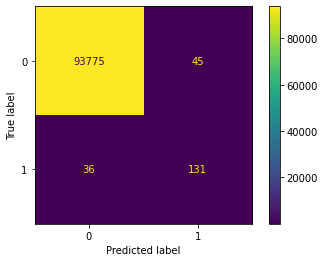

In [21]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = pd.DataFrame(dtc.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_dtc.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred_dtc))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_dtc))
print("precision: ", metrics.precision_score(y_test, y_pred_dtc))
print("recall: ", metrics.recall_score(y_test, y_pred_dtc))

depth = dtc.get_depth()
leaves = dtc.get_n_leaves()
print("depth of the decision tree: ", depth)
print("Leafes in the decision tree: ", leaves)

plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

#tree.plot_tree(dtc)

#### 5.1 Adding class weights and prune the tree to avoid overfitting 

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93820
1      167
dtype: int64
f1 score on test data :  0.8203592814371257
blanaced acc:  0.9100197600960943
precision:  0.8203592814371258
recall:  0.8203592814371258


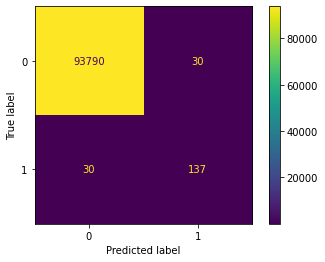

[Text(697.5, 733.86, 'X[13] <= -3.885\nentropy = 0.113\nsamples = 190820\nvalue = [19049.5, 292.5]'),
 Text(348.75, 570.78, 'X[9] <= -1.717\nentropy = 0.628\nsamples = 684\nvalue = [42.9, 229.5]'),
 Text(174.375, 407.70000000000005, 'X[6] <= 0.836\nentropy = 0.148\nsamples = 295\nvalue = [4.8, 222.3]'),
 Text(87.1875, 244.62, 'X[26] <= 2.129\nentropy = 0.104\nsamples = 270\nvalue = [3.0, 216.0]'),
 Text(43.59375, 81.54000000000008, 'entropy = 0.014\nsamples = 172\nvalue = [0.2, 153.0]'),
 Text(130.78125, 81.54000000000008, 'entropy = 0.254\nsamples = 98\nvalue = [2.8, 63.0]'),
 Text(261.5625, 244.62, 'X[25] <= 0.511\nentropy = 0.764\nsamples = 25\nvalue = [1.8, 6.3]'),
 Text(217.96875, 81.54000000000008, 'entropy = 0.0\nsamples = 15\nvalue = [1.5, 0.0]'),
 Text(305.15625, 81.54000000000008, 'entropy = 0.267\nsamples = 10\nvalue = [0.3, 6.3]'),
 Text(523.125, 407.70000000000005, 'X[20] <= -0.198\nentropy = 0.632\nsamples = 389\nvalue = [38.1, 7.2]'),
 Text(435.9375, 244.62, 'X[19] <= -2

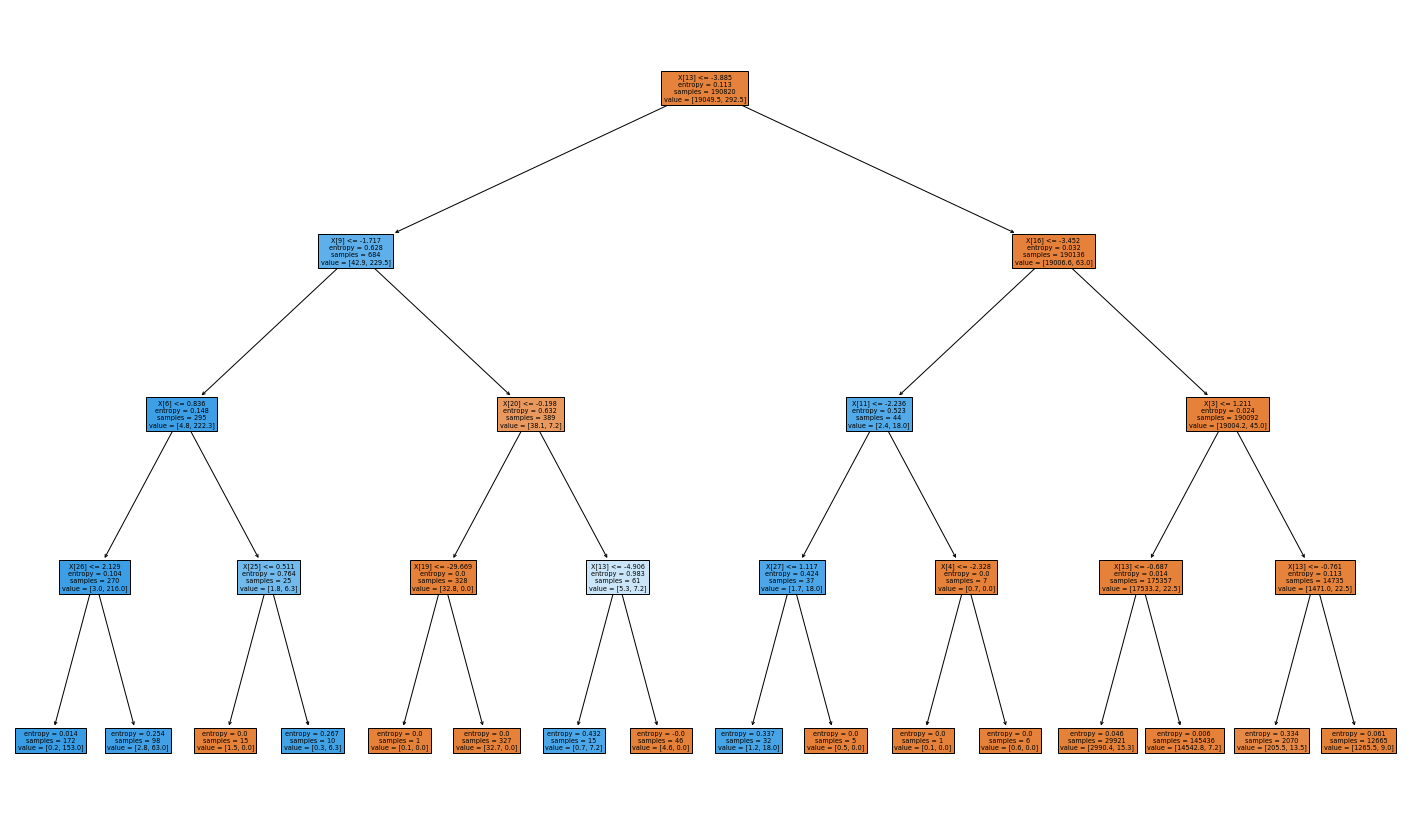

In [22]:
class_weight_dtc = {
    0: .1,
    1: .9
}

# Train and fit model 
dtc_weighted = tree.DecisionTreeClassifier(criterion="entropy", class_weight=class_weight_dtc, max_depth=4, max_leaf_nodes=20)
dtc_weighted.fit(X_train, y_train)
y_pred_dtc_w = pd.DataFrame(dtc_weighted.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_dtc_w.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_dtc_w))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_dtc_w))
print("precision: ", metrics.precision_score(y_test, y_pred_dtc_w))
print("recall: ", metrics.recall_score(y_test, y_pred_dtc_w))

plot_confusion_matrix(dtc_weighted, X_test, y_test)
plt.show()

plt.figure(figsize=(25,15))
tree.plot_tree(dtc_weighted, filled=True)
 

#### 6. Random forest classification

In [16]:
rfc = RandomForestClassifier(criterion="entropy")
rfc.fit(X_train, y_train)
y_pred_rfc = pd.DataFrame(rfc.predict(X_test))

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93843
1      144
dtype: int64
f1 score on test data :  0.8617363344051446
blanaced acc:  0.9011443112495963
precision:  0.9305555555555556
recall:  0.8023952095808383


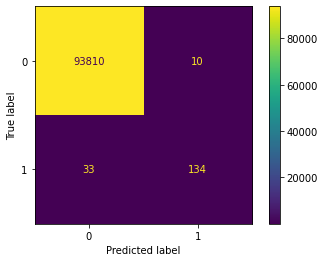

In [23]:
# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_rfc.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_rfc))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_rfc))
print("precision: ", metrics.precision_score(y_test, y_pred_rfc))
print("recall: ", metrics.recall_score(y_test, y_pred_rfc))

plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

#### 6.1 Random forest weighted and pruned

In [18]:
rfc_weighted = RandomForestClassifier(class_weight=class_weight, max_depth=5, max_leaf_nodes=20)
rfc_weighted.fit(X_train, y_train)
y_pred_rfc_w = pd.DataFrame(rfc.predict(X_test))

y_test value counts:  0    93820
1      167
Name: Class, dtype: int64
y_pred value counts:  0    93843
1      144
dtype: int64
f1 score on test data :  0.8617363344051446
blanaced acc:  0.9011443112495963
precision:  0.9305555555555556
recall:  0.8023952095808383


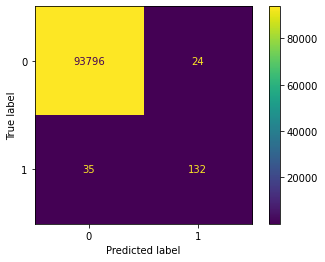

In [24]:
# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_rfc_w.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_rfc_w))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_rfc_w))
print("precision: ", metrics.precision_score(y_test, y_pred_rfc_w))
print("recall: ", metrics.recall_score(y_test, y_pred_rfc_w))

plot_confusion_matrix(rfc_weighted, X_test, y_test)
plt.show()

### Summary

The weighted logistic regression model seem to give a pretty accurate model with a recall of 80% aswell as the weighted decision tree with 82% recall. 
In upcoming notebook i will focus on pipelines and crossvalidation. 